In [1]:
import pandas as pd
from prophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [2]:
df = pd.read_table('data/1.tsv')
df2 = pd.read_table('data/2.tsv')

df.pop('lensfiletime_utc')
df2.dropna(inplace=True)
df2.pop('lensfiletime_kst')
df = df.join(df2.set_index('targetdate12digit'), on='time_kst')

# 시간 순으로 정렬
df.sort_values(by='time_kst', inplace=True)

# 결측값 채우기
df.fillna(method='ffill', inplace=True)

df['time'] = pd.to_datetime(df['time_kst'], format='%Y%m%d%H%M%S')
df.drop('time_kst', axis=1, inplace=True)

flood = df[['time', 'value']]
flood.rename(columns={'time': 'ds', 'value': 'y'}, inplace=True)

/tmp/ipykernel_653/1781884099.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flood.rename(columns={'time': 'ds', 'value': 'y'}, inplace=True)


In [3]:
m = Prophet()
m.fit(flood)

14:26:17 - cmdstanpy - INFO - Chain [1] start processing
14:27:16 - cmdstanpy - INFO - Chain [1] done processing


In [4]:
future = m.make_future_dataframe(periods=10000, freq='H')
future.tail()

,ds
20457,2021-10-24 14:00:00
20458,2021-10-24 15:00:00
20459,2021-10-24 16:00:00
20460,2021-10-24 17:00:00
20461,2021-10-24 18:00:00


In [5]:
forecast = m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
20457,2021-10-24 14:00:00,-26.480493,-239.470590,268.404248,-284.558948,198.134080,50.304038,50.304038,50.304038,-0.599399,...,4.196113,4.196113,4.196113,46.707323,46.707323,46.707323,0.0,0.0,0.0,23.823544
20458,2021-10-24 15:00:00,-26.481363,-233.077096,273.960785,-284.572858,198.177033,54.318002,54.318002,54.318002,3.157527,...,4.358150,4.358150,4.358150,46.802325,46.802325,46.802325,0.0,0.0,0.0,27.836639
20459,2021-10-24 16:00:00,-26.482233,-229.904527,275.801544,-284.586769,198.219985,57.269418,57.269418,57.269418,5.863663,...,4.507488,4.507488,4.507488,46.898267,46.898267,46.898267,0.0,0.0,0.0,30.787186
20460,2021-10-24 17:00:00,-26.483102,-239.571228,285.154153,-284.600680,198.262938,57.566207,57.566207,57.566207,5.930252,...,4.640820,4.640820,4.640820,46.995136,46.995136,46.995136,0.0,0.0,0.0,31.083105
20461,2021-10-24 18:00:00,-26.483972,-236.704773,263.817074,-284.614590,198.305891,55.711741,55.711741,55.711741,3.863970,...,4.754856,4.754856,4.754856,47.092915,47.092915,47.092915,0.0,0.0,0.0,29.227769


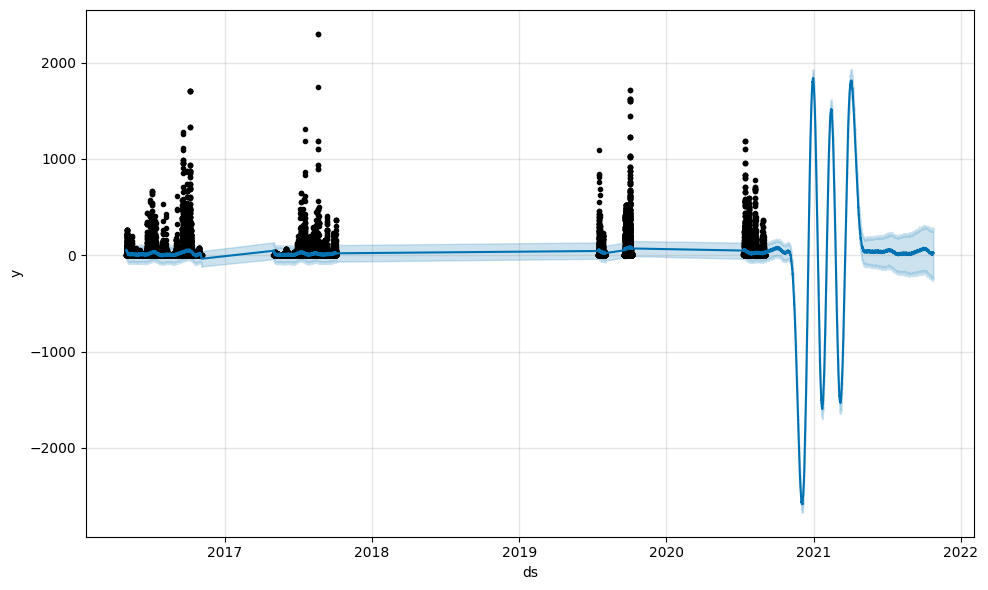

In [6]:
fig1 = m.plot(forecast)

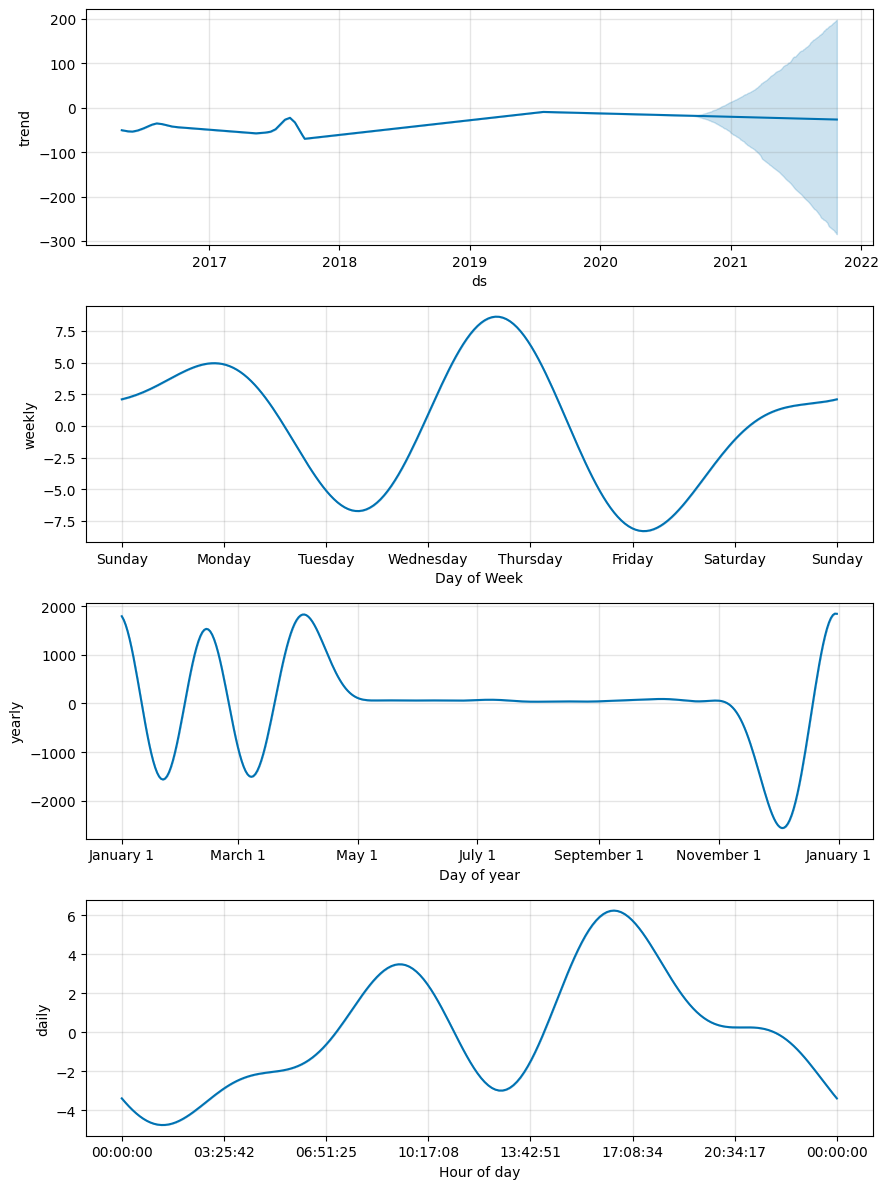

In [7]:
fig2 = m.plot_components(forecast)

In [12]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

NameError: name 'go' is not defined

In [ ]:
plot_components_plotly(m, forecast)

NameError: name 'go' is not defined